## TP sur l'AFC en Python

Fait par Vincent LIU, traduction du TP en R de Fanny Villers.

In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
data = pd.read_csv("../data/Presidentielle.CSV", index_col=0)

### Statistique descriptive

In [4]:
n, p = data.shape
print("Il y a {} régions et {} candidats.".format(n,p))

Il y a 23 régions et 12 candidats.


In [4]:
data.describe()

,Sarkozy,Bayrou,Royal,Le Pen,Besanc.,Villiers,Voynet,Laguiller,Bove,Buffet,Nihous,Schivardi
count,2.300000e+01,2.300000e+01,2.300000e+01,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,4.923304e+05,2.934785e+05,4.088173e+05,166272.086957,64975.913043,35469.086957,24793.043478,21151.956522,20831.521739,30673.347826,18265.086957,5361.086957
std,4.011838e+05,2.408640e+05,3.205486e+05,110988.510044,40191.861478,25711.488942,19547.947152,12788.345079,13913.197410,25086.997579,10666.914383,3355.324099
min,5.681900e+04,1.897900e+04,3.349300e+04,23432.000000,5941.000000,1908.000000,2119.000000,1346.000000,1659.000000,5163.000000,2260.000000,450.000000
25%,2.892290e+05,1.653155e+05,2.173925e+05,91390.500000,37473.000000,21473.500000,13284.500000,13690.500000,12429.500000,14878.500000,9697.000000,2806.000000
50%,3.623910e+05,2.142590e+05,3.222120e+05,143926.000000,58312.000000,28166.000000,20382.000000,18623.000000,14904.000000,22334.000000,20439.000000,4207.000000
75%,5.448170e+05,3.795985e+05,5.547900e+05,182804.000000,83280.500000,40957.000000,29836.500000,25618.000000,27676.500000,36333.000000,23425.500000,7026.500000
max,1.931429e+06,1.143081e+06,1.593033e+06,430553.000000,181247.000000,107895.000000,89885.000000,52965.000000,57453.000000,110967.000000,43595.000000,12386.000000


In [5]:
data.head()

,Sarkozy,Bayrou,Royal,Le Pen,Besanc.,Villiers,Voynet,Laguiller,Bove,Buffet,Nihous,Schivardi
Alsace,362391,214259,171282,135730,33310,22492,20382,13821,13758,6100,5142,2522
Aquitaine,532127,417546,557300,168664,78230,34028,28285,22046,27941,41791,35300,7572
Auvergne,238152,169395,225477,78704,41522,18730,12090,12936,13532,21920,12474,4207
Bourgogne,297544,175213,241094,119041,42246,24971,13690,14440,12296,18154,12079,3608
Bretagne,557507,451988,564100,143926,94205,41212,39026,25662,28484,31860,21207,5169


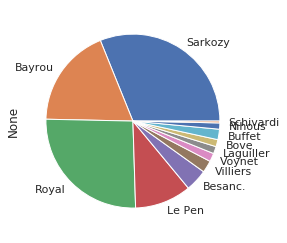

In [6]:
data.sum(axis = 0).plot.pie() # Part de vote de chaque candidat

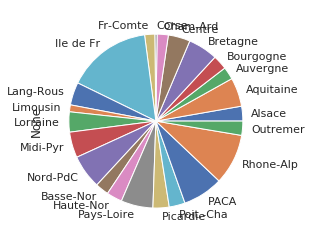

In [7]:
data.sum(axis = 1).plot.pie()

La région Ile de France présente plus d'électeurs.

## Test du Khi-deux pour muserer l'écart à l'indépendance

In [8]:
from scipy.stats import chi2_contingency
X_squared, p, df, _ = chi2_contingency(data)
print("Pearson's Chi-squared test")
print("X-squared = {}, df = {}, p-value = {}".format(X_squared, df,p ))

Pearson's Chi-squared test
X-squared = 1215973.3297393597, df = 242, p-value = 0.0


Les deux variables sont donc liées.

## Analyse Factorielle des correspondances - AFC

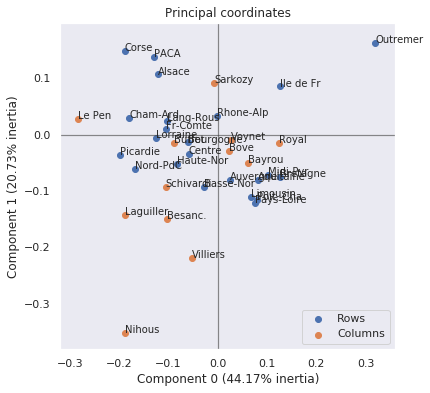

In [9]:
import prince
ca = prince.CA(n_components=data.shape[0])
ca.fit(data)
ax = ca.plot_coordinates(data)

## Affichage du résumé

In [17]:
def summary_row(ca):
    """
        Test
    """
    # Chi square test
    X_squared, p, df, _ = chi2_contingency(data)
    print("\n----------")
    print("Chi square")
    print("----------")
    
    print("The chi square of independence between the two variables is equal to {} (p-value =  0).\n".format(int(X_squared),p))
    
    nb_axis = 3
    lambd = ca.eigenvalues_
    # Eigenvalues
    print("\n-----------")
    print("Eigenvalues")
    print("-----------")
    eig = pd.DataFrame()
    eig['Variance'] = np.array(ca.eigenvalues_[:nb_axis])
    eig['% of var'] = np.array(ca.explained_inertia_[:nb_axis])
    eig['Cumulative% of var'] = np.cumsum(ca.explained_inertia_[:nb_axis])
    print(eig.T)
    
    # Rows
    print("\n----------------")
    print("Rows Coordinates")
    print("----------------")
    print(-ca.row_coordinates(data).iloc[:,:nb_axis])
    
    print("\n--------")
    print("Rows CTR")
    print("--------")
    pi  = ( data.sum(axis = 1) / data.values.sum() ).values ## Le poids qu'on donne, dans l'acp tlm a le mm poids
    CTR = np.square(-ca.row_coordinates(data)) * pi[:,None] / lambd[:] * 100
    print(CTR.iloc[:,:nb_axis])
    
def summary_column(ca):
    """
        Test
    """
    # Chi square test
    X_squared, p, df, _ = chi2_contingency(data)
    print("\n----------")
    print("Chi square")
    print("----------")
    
    print("The chi square of independence between the two variables is equal to {} (p-value =  0).\n".format(int(X_squared),p))
    
    nb_axis = 3
    lambd = ca.eigenvalues_  
    # Eigenvalues
    print("\n-----------")
    print("Eigenvalues")
    print("-----------")
    eig = pd.DataFrame()
    eig['Variance'] = np.array(ca.eigenvalues_[:nb_axis])
    eig['% of var'] = np.array(ca.explained_inertia_[:nb_axis])
    eig['Cumulative% of var'] = np.cumsum(ca.explained_inertia_[:nb_axis])
    print(eig.T)
    
    # Rows
    print("\n-------------------")
    print("Columns Coordinates")
    print("-------------------")
    print(-ca.column_coordinates(data).iloc[:,:nb_axis])
    
    print("\n-----------")
    print("Columns CTR")
    print("-----------")
    pi  = ( data.sum(axis = 0) / data.values.sum() ).values ## Le "Poids" qu'on donne
    CTR = np.square(-ca.column_coordinates(data)) * pi[:,None] / lambd[:] * 100
    print(CTR.iloc[:,:nb_axis])

In [200]:
summary_row(ca)


----------
Chi square
----------
The chi square of independence between the two variables is equal to 1215973 (p-value =  0).


-----------
Eigenvalues
-----------
                           0         1         2
Variance            0.014757  0.006926  0.006521
% of var            0.441689  0.207301  0.195172
Cumulative% of var  0.441689  0.648990  0.844162

----------------
Rows Coordinates
----------------
                   0         1         2
Alsace      0.121883 -0.106710  0.187614
Aquitaine  -0.082145  0.080618 -0.027619
Auvergne   -0.025060  0.080737 -0.027201
Bourgogne   0.060721  0.013889  0.000577
Bretagne   -0.125870  0.075264  0.035399
Centre      0.059343  0.034958  0.039719
Cham-Ard    0.179930 -0.029106  0.020748
Corse       0.189062 -0.148526 -0.094098
Fr-Comte    0.104778 -0.009294 -0.001223
Ile de Fr  -0.126320 -0.085429  0.023076
Lang-Rous   0.102906 -0.023544 -0.090185
Limousin   -0.067310  0.110302 -0.119926
Lorraine    0.126405  0.005405  0.013738
Midi-Pyr   -0

In [19]:
summary_column(ca)


----------
Chi square
----------
The chi square of independence between the two variables is equal to 1215973 (p-value =  0).


-----------
Eigenvalues
-----------
                           0         1         2
Variance            0.014757  0.006926  0.006521
% of var            0.441689  0.207301  0.195172
Cumulative% of var  0.441689  0.648990  0.844162

-------------------
Columns Coordinates
-------------------
                  0         1         2
Sarkozy    0.007066 -0.091129  0.027439
Bayrou    -0.061044  0.050039  0.103173
Royal     -0.124421  0.014647 -0.086361
Le Pen     0.283909 -0.027441 -0.029679
Besanc.    0.102572  0.149672 -0.036797
Villiers   0.052720  0.219452  0.215026
Voynet    -0.026881  0.009494  0.099134
Laguiller  0.187752  0.142578 -0.081170
Bove      -0.022176  0.029766 -0.035833
Buffet     0.088576  0.014910 -0.192083
Nihous     0.187964  0.351426 -0.130980
Schivardi  0.105983  0.093016 -0.092068

-----------
Columns CTR
-----------
                   0 

## Liens utiles

D'après le cours de [Fanny Villers](https://www.lpsm.paris/pageperso/villers/)

Site de [Francois Husson](https://husson.github.io/index.html) pour en savoir plus

Python: [prince CA](https://github.com/MaxHalford/prince#correspondence-analysis-ca)

R: [FactoMineR](http://factominer.free.fr/factomethods/analyse-en-composantes-principales.html)